In [ ]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
# Google Drive path where coursework material is available
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'My_Individual_Project'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['accepted_2007_to_2018q4.csv.zip', 'accepted_2013_to_2018_filtered.csv', 'Dummy_model.ipynb', 'accepted_2013_to_2018_latest.csv', 'accepted_2013_to_2018_latest1.csv', 'sample_model.ipynb', 'Cleaned_data.csv', 'Final_balanced_data.csv', 'Model_3_Random_Forest.ipynb', 'Model_2_Decesion_Tree.ipynb', 'Model_1_Logistic_regression.ipynb', 'Model_4_XGBoost.ipynb', 'ANN_2.ipynb', 'Model_5_ANN.ipynb', 'NN_Keras.ipynb', 'EDA.ipynb', 'Data_cleaning.ipynb', 'Individual_loans_cleaning.ipynb', 'FINAL_unbalancedData.csv', 'FINAL_balancedData.csv', 'Individual_loans_hypothesisTesting.ipynb', 'FINAL_forModeling.csv', 'Random_forest_model.ipynb', 'XGBoost_model.ipynb']


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from xgboost import XGBClassifier

In [ ]:
#load data
df = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, 'FINAL_balancedData.csv'))


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df.head() #display top 5 rows of data

,loan_amnt,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bc_limit,total_il_high_credit_limit,disbursement_method,emp_length_years,term_years,fico_score,fico_score_last,credit_history_years
0,3600.0,13.99,C,C4,MORTGAGE,55000.0,Not Verified,0,debt_consolidation,PA,5.91,0.0,1.0,30.0,999.0,7.0,0.0,2765.0,29.7,13.0,0.0,0.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,2400.0,13734.0,Cash,10,3,677.0,562.0,12.33
1,24700.0,11.99,C,C1,MORTGAGE,65000.0,Not Verified,0,small_business,SD,16.06,1.0,4.0,6.0,999.0,22.0,0.0,21470.0,19.2,38.0,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,79300.0,24667.0,Cash,10,3,717.0,697.0,16.00
2,10400.0,22.45,F,F1,MORTGAGE,104433.0,Source Verified,0,major_purchase,PA,25.37,1.0,3.0,12.0,999.0,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,20300.0,88097.0,Cash,3,5,697.0,702.0,17.50
3,11950.0,13.44,C,C3,RENT,34000.0,Source Verified,0,debt_consolidation,GA,10.20,0.0,0.0,999.0,999.0,5.0,0.0,8822.0,68.4,6.0,0.0,0.0,12798.0,0.0,1.0,0.0,0.0,338.0,3976.0,99.0,0.0,0.0,4522.0,76.0,12900.0,0.0,0.0,0.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,5.0,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,9400.0,4000.0,Cash,4,3,692.0,757.0,28.16
4,20000.0,9.17,B,B2,MORTGAGE,180000.0,Not Verified,0,debt_consolidation,MN,14.67,0.0,0.0,49.0,999.0,12.0,0.0,87329.0,84.5,27.0,0.0,0.0,360358.0,0.0,2.0,0.0,2.0,18.0,29433.0,63.0,2.0,3.0,13048.0,74.0,94200.0,1.0,0.0,1.0,6.0,30030.0,0.0,102.9,0.0,0.0,142.0,306.0,10.0,10.0,4.0,12.0,10.0,0.0,4.0,6.0,4.0,5.0,7.0,9.0,16.0,6.0,0.0,0.0,2.0,96.3,100.0,0.0,0.0,388852.0,31500.0,46452.0,Cash,10,3,682.0,652.0,25.50


In [ ]:
# df['loan_status'].value_counts()

,count
loan_status,
0,926358
1,228756


In [ ]:
df[cat_col].head() # categorical features , displayed top 5

,grade,sub_grade,home_ownership,verification_status,purpose,addr_state,disbursement_method,purpose_category
0,B,B2,MORTGAGE,Not Verified,credit_card,UT,Cash,credit_card
1,B,B3,MORTGAGE,Verified,debt_consolidation,KS,Cash,debt_consolidation
2,C,C1,RENT,Not Verified,debt_consolidation,VT,Cash,debt_consolidation
3,D,D1,RENT,Source Verified,debt_consolidation,FL,Cash,debt_consolidation
4,C,C3,RENT,Source Verified,debt_consolidation,MI,Cash,debt_consolidation


In [ ]:
cat_col = df.select_dtypes(include = [ 'object']).columns.to_list()  #categorical features list

In [ ]:
#one hot encoding for categorical features except those with those with ordinal values like grade and and subgrade
verification_status_one_hot = pd.get_dummies(df['verification_status'], dtype=int)
home_ownership_one_hot = pd.get_dummies(df['home_ownership'], dtype=int)
purpose_one_hot = pd.get_dummies(df['purpose'], dtype=int)
addr_state_one_hot = pd.get_dummies(df['addr_state'], dtype=int)
disbursement_method_one_hot = pd.get_dummies(df['disbursement_method'], dtype=int)
purpose_category_one_hot = pd.get_dummies(df['purpose_category'], dtype=int)

In [ ]:
#define label encoder
label_encoder = LabelEncoder()

In [ ]:
#list of ordinal columns
or_col = ['grade','sub_grade']

In [ ]:
#label encoding ordinal categorical features
for col in or_col:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

In [ ]:
one_hot = pd.concat([disbursement_method_one_hot,addr_state_one_hot,purpose_one_hot,verification_status_one_hot,home_ownership_one_hot,purpose_category_one_hot], axis =1)

In [ ]:
df1 = df.copy() #copy dataset

In [ ]:
df1 = pd.concat([df1,one_hot], axis =1) #added one hot features

In [ ]:
df1 = df1.drop(['verification_status','home_ownership','purpose','addr_state','disbursement_method'], axis =1) #delete the features with one hot values have added in dataset above

In [ ]:
df1 = df1.drop('purpose_category',axis=1)

In [ ]:
#Top 20 features obtained by Random forest
Random_forest_top_20 = [
    "int_rate",
    "sub_grade",
    "term_years",
    "inq_last_6mths",
    "grade",
    "mths_since_last_delinq",
    "num_tl_op_past_12m",
    "Not Verified",
    "acc_open_past_24mths",
    "MORTGAGE",
    "fico_score",
    "num_rev_tl_bal_gt_0",
    "emp_length_years",
    "Source Verified",
    "mths_since_last_record",
    "num_actv_rev_tl",
    "pub_rec",
    "Verified",
    "mths_since_recent_inq",
    "mort_acc"
]

In [ ]:
# df2 = df1[top_15_feature_names+ ['loan_status']]
df2 = df1[Random_forest_top_20+ ['loan_status']] # experimented with different features : Random forest top 20, XGBoost top 20, XGBoost top15

In [ ]:
print(top_15_feature_names) #top 15 features of XGBoost

['Verified', 'inq_last_6mths', 'Source Verified', 'sub_grade', 'grade', 'num_tl_op_past_12m', 'major_purchase', 'Not Verified', 'acc_open_past_24mths', 'delinq_2yrs', 'int_rate', 'credit_card', 'mort_acc', 'term_years', 'MORTGAGE', 'num_actv_rev_tl', 'RENT', 'other', 'mths_since_last_delinq', 'open_il_12m']


In [ ]:
# X = df1.drop('loan_status', axis =1)
# y = df1['loan_status']
X = df2.drop('loan_status', axis =1)
y = df2['loan_status']

In [ ]:
#Define function for oversampling using SMOTE with upsample by 50% of the majority class
def oversampling_smote(df, target_col, ratio_upsample=0.5, random_state=7):
    X = df.drop(columns=[target_col]) #dependent variable
    y = df[target_col]

    print("Original class distribution:")
    print(y.value_counts())
    print(f"Majority class: {sum(y == 0)}")
    print(f"Minority class: {sum(y == 1)}")

    #calculate number of samples required for minority class
    sum_minority = sum(y == 1)
    num_samples = int(sum_minority * (1 + ratio_upsample))

    # Perform SMOTE
    smote = SMOTE(sampling_strategy={1: num_samples}, random_state=random_state)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # concatenate dependent and independent variables
    df_upsampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                                pd.Series(y_resampled, name=target_col)], axis=1)


    print("\Oversampled class distribution:")# Resampled class distribution
    print(df_upsampled[target_col].value_counts())

    # Reset index
    df_upsampled = df_upsampled.sample(frac=1, random_state=random_state).reset_index(drop=True)

    return df_upsampled #return upsampled class

In [ ]:

#Experimented with different dataframes(adding and ommiting feature) with taking different combinations of features, latest one has top 20 random forest features
df_upsampled = oversampling_smote(df2, 'loan_status', upsample_ratio=0.5, random_state=7)

print(f"\nShape of the oversampled DataFrame: {df_upsampled.shape}")

# percentage increase in data
original_size = len(df1)
oversampled_size = len(df_oversampled)
percentage_increase = ((oversampled_size - original_size) / original_size) * 100

print(f"Percentage increase in data: {percentage_increase:.2f}%")

# split data into test and train in 20:80 ratio
X = df_upsampled.drop('loan_status', axis=1)
y = df_upsampled['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,train_size=0.8, )

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Original class distribution:
loan_status
0    733482
1    247784
Name: count, dtype: int64
Majority class: 733482
Minority class: 247784

Oversampled class distribution:
loan_status
0    733482
1    371676
Name: count, dtype: int64

Shape of the oversampled DataFrame: (1105158, 21)
Percentage increase in data: 12.63%

Training set shape: (884126, 20)
Testing set shape: (221032, 20)


In [ ]:
X_train.head()

,loan_amnt,int_rate,grade,sub_grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,emp_length_years,term_years,fico_score,credit_history_years,Cash,DirectPay,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Not Verified,Source Verified,Verified,ANY,MORTGAGE,OWN,RENT,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,others,small_business,vacation
744598,18000.0,10.42,1,7,75000.0,15.35,0.0,1.0,999.0,999.0,16.0,0.0,27413.0,23.7,21.0,1620.74,0.0,0.0,66154.0,2.0,2.0,2.0,5.0,3.0,38741.0,95.0,5.0,6.0,7345.0,42.0,115600.0,2.0,0.0,10.0,11.0,4135.0,72787.0,27.4,0.0,0.0,143.0,82.0,7.0,3.0,0.0,8.0,3.0,0.0,9.0,9.0,11.0,11.0,6.0,14.0,15.0,9.0,0.0,0.0,7.0,100.0,0.0,0.0,0.0,156350.0,66154.0,100200.0,0.0,3,687.0,11.92,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
173597,17000.0,18.99,3,18,70500.0,12.48,0.0,0.0,59.0,999.0,6.0,0.0,16040.0,40.7,22.0,1621.75,0.0,0.0,37338.0,2.0,1.0,1.0,2.0,2.0,21298.0,99.0,2.0,2.0,14394.0,61.0,39400.0,2.0,1.0,6.0,4.0,7468.0,21360.0,42.9,0.0,0.0,161.0,257.0,4.0,2.0,6.0,4.0,2.0,2.0,2.0,2.0,4.0,7.0,4.0,5.0,12.0,2.0,0.0,0.0,3.0,90.9,0.0,0.0,0.0,60974.0,37338.0,37400.0,10.0,5,692.0,21.50,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
546643,16800.0,15.31,2,14,40000.0,28.29,0.0,0.0,999.0,999.0,6.0,0.0,10940.0,83.5,17.0,3954.24,0.0,0.0,19353.0,0.0,1.0,0.0,0.0,36.0,8413.0,34.0,0.0,1.0,3221.0,51.0,13100.0,0.0,0.0,0.0,1.0,3226.0,2215.0,75.7,0.0,0.0,54.0,138.0,21.0,21.0,0.0,21.0,5.0,0.0,4.0,5.0,4.0,10.0,3.0,5.0,14.0,5.0,0.0,0.0,0.0,100.0,75.0,0.0,0.0,38100.0,19353.0,9100.0,10.0,3,687.0,11.50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
825694,9500.0,8.24,1,5,135000.0,14.04,0.0,0.0,999.0,999.0,7.0,0.0,14664.0,69.0,21.0,923.69,0.0,0.0,353428.0,1.0,2.0,0.0,2.0,15.0,69829.0,83.0,2.0,2.0,6695.0,69.0,21100.0,0.0,0.0,1.0,5.0,50489.0,5275.0,69.0,0.0,0.0,137.0,155.0,6.0,6.0,4.0,6.0,7.0,0.0,4.0,4.0,5.0,7.0,9.0,4.0,8.0,4.0,0.0,0.0,2.0,90.0,75.0,0.0,0.0,380140.0,84493.0,21100.0,10.0,3,682.0,12.92,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
664711,18000.0,10.99,1,8,96000.0,2.60,0.0,2.0,999.0,74.0,5.0,1.0,6090.0,51.2,19.0,3132.86,0.0,0.0,6090.0,-1.0,-1.0,-1.0,-1.0,999.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,11900.0,-1.0,-1.0,-1.0,3.0,1218.0,4610.0,56.9,0.0,0.0,130.0,136.0,5.0,5.0,0.0,5.0,4.0,0.0,3.0,3.0,4.0,8.0,4.0,5.0,15.0,3.0,0.0,0.0,2.0,100.0,25.0,1.0,0.0,11900.0,6090.0,10700.0,9.0,3,662.0,11.42,1,0,0,0,0,0,1,0

In [ ]:
X_train1 = X_train.values

In [ ]:
X_train.head()

,int_rate,sub_grade,term_years,inq_last_6mths,grade,mths_since_last_delinq,num_tl_op_past_12m,Not Verified,acc_open_past_24mths,MORTGAGE,fico_score,num_rev_tl_bal_gt_0,emp_length_years,Source Verified,mths_since_last_record,num_actv_rev_tl,pub_rec,Verified,mths_since_recent_inq,mort_acc
744598,10.42,7,3,1.0,1,999.0,7.0,0,11.0,0,687.0,9.0,0.0,1,999.0,9.0,0.0,0,3.0,0.0
173597,18.99,18,5,0.0,3,59.0,3.0,1,4.0,0,692.0,2.0,10.0,0,999.0,2.0,0.0,0,2.0,6.0
546643,15.31,14,3,0.0,2,999.0,0.0,0,1.0,0,687.0,5.0,10.0,0,999.0,5.0,0.0,1,5.0,0.0
825694,8.24,5,3,0.0,1,999.0,2.0,1,5.0,1,682.0,4.0,10.0,0,999.0,4.0,0.0,0,7.0,4.0
664711,10.99,8,3,2.0,1,999.0,2.0,0,3.0,0,662.0,3.0,9.0,1,74.0,3.0,1.0,0,4.0,0.0


In [ ]:
model = XGBClassifier()

In [ ]:
y_train1 = y_train.values

In [ ]:
model.fit(X_train1, y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
X_test1 = X_test.values

In [ ]:
predict = model.predict(X_test1)

In [ ]:
y_test1 = y_test.values

In [ ]:
X_test.head()

,loan_amnt,int_rate,grade,sub_grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,emp_length_years,term_years,fico_score,credit_history_years,Cash,DirectPay,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Not Verified,Source Verified,Verified,ANY,MORTGAGE,OWN,RENT,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,others,small_business,vacation
141650,9450.0,21.97,4,23,30000.0,29.40,0.0,2.0,999.0,999.0,7.0,0.0,3565.0,89.1,16.0,2158.37,0.0,0.0,49980.0,1.0,2.0,1.0,2.0,9.0,8134.0,50.0,2.0,3.0,524.0,58.0,4000.0,0.0,0.0,2.0,5.0,7140.0,176.0,74.9,0.0,0.0,165.0,174.0,3.0,3.0,4.0,8.0,0.0,0.0,1.0,4.0,1.0,1.0,4.0,4.0,8.0,4.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,63296.0,11699.0,700.0,1.0,3,687.0,18.33,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
354986,2000.0,11.67,1,8,52000.0,21.69,2.0,0.0,15.0,999.0,25.0,0.0,29937.0,35.7,41.0,143.17,0.0,0.0,34403.0,-1.0,-1.0,-1.0,-1.0,999.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,83800.0,-1.0,-1.0,-1.0,6.0,1720.0,30413.0,48.7,0.0,0.0,143.0,169.0,12.0,12.0,0.0,16.0,16.0,0.0,2.0,6.0,8.0,13.0,4.0,23.0,37.0,6.0,0.0,0.0,1.0,90.2,25.0,0.0,0.0,105360.0,34403.0,59300.0,2.0,3,722.0,14.16,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
890227,8000.0,7.89,0,4,63000.0,15.62,2.0,0.0,6.0,999.0,15.0,0.0,18013.0,61.9,28.0,909.84,0.0,0.0,186600.0,-1.0,-1.0,-1.0,-1.0,999.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,29100.0,-1.0,-1.0,-1.0,3.0,14354.0,5046.0,76.6,0.0,0.0,152.0,200.0,8.0,8.0,5.0,8.0,22.0,1.0,5.0,8.0,5.0,10.0,3.0,13.0,20.0,8.0,0.0,0.0,1.0,82.1,60.0,0.0,0.0,214149.0,19809.0,21600.0,10.0,3,687.0,16.66,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
796180,8000.0,12.69,2,11,37500.0,20.22,0.0,0.0,45.0,999.0,7.0,0.0,3604.0,25.4,11.0,1573.65,0.0,0.0,17907.0,-1.0,-1.0,-1.0,-1.0,999.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,14200.0,-1.0,-1.0,-1.0,4.0,2558.0,8287.0,21.1,0.0,0.0,186.0,159.0,3.0,2.0,0.0,3.0,5.0,0.0,4.0,5.0,4.0,6.0,4.0,5.0,7.0,5.0,0.0,0.0,3.0,90.9,0.0,0.0,0.0,36487.0,17907.0,10500.0,2.0,3,732.0,15.58,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
560465,19000.0,5.32,0,0,100000.0,11.30,0.0,0.0,999.0,999.0,7.0,0.0,24861.0,57.7,19.0,16.85,0.0,0.0,39919.0,1.0,1.0,0.0,0.0,30.0,15058.0,57.0,1.0,1.0,14034.0,57.0,43100.0,1.0,1.0,0.0,1.0,5703.0,8182.0,73.9,0.0,0.0,136.0,252.0,6.0,6.0,1.0,6.0,19.0,0.0,3.0,5.0,3.0,3.0,10.0,6.0,8.0,5.0,0.0,0.0,1.0,100.0,66.7,0.0,0.0,69624.0,39919.0,31400.0,0.0,3,707.0,21.08,1,0,0,0,0,0,0,0,0,

In [ ]:
print("Classification Report:") #top 20: Random forest features
print(classification_report(y_test1, predict))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.85    146680
           1       0.84      0.44      0.58     74352

    accuracy                           0.78    221032
   macro avg       0.80      0.70      0.72    221032
weighted avg       0.79      0.78      0.76    221032



In [ ]:
print("Classification Report:") #top 20 XGBoost
print(classification_report(y_test1, predict))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.95      0.85    146680
           1       0.83      0.44      0.58     74352

    accuracy                           0.78    221032
   macro avg       0.80      0.70      0.71    221032
weighted avg       0.79      0.78      0.76    221032



In [ ]:
print("Classification Report:") #All selected features
print(classification_report(y_test1, predict))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86    146680
           1       0.81      0.53      0.64     74352

    accuracy                           0.80    221032
   macro avg       0.80      0.73      0.75    221032
weighted avg       0.80      0.80      0.79    221032



In [ ]:
accuracy_score(y_test1, predict) #all features

0.800010858156285

In [ ]:
accuracy_score(y_test1, predict) #using top 20 features

0.7808281153860075

In [ ]:
accuracy_score(y_test1, predict) #using top 20 features: Random forest features

0.7831988128415796

In [ ]:
#Random Forest gave better accuracy and overall performance

In [ ]:
X.head()

,int_rate,sub_grade,term_years,inq_last_6mths,grade,mths_since_last_delinq,num_tl_op_past_12m,Not Verified,acc_open_past_24mths,MORTGAGE,fico_score,num_rev_tl_bal_gt_0,emp_length_years,Source Verified,mths_since_last_record,num_actv_rev_tl,pub_rec,Verified,mths_since_recent_inq,mort_acc
0,13.67,12,3,1.0,2,999.000000,12.000000,0,17.000000,1,662.0,9.0,6.000000,0,25.0,9.0,1.0,1,4.000000,0.0
1,9.99,7,3,0.0,1,8.991708,0.747927,0,2.747927,0,682.0,2.0,8.747927,1,999.0,2.0,0.0,0,8.747927,0.0
2,10.99,8,3,0.0,1,67.000000,4.000000,0,6.000000,1,682.0,4.0,10.000000,1,999.0,4.0,0.0,0,10.000000,3.0
3,9.17,6,3,0.0,1,61.000000,0.000000,0,3.000000,1,677.0,10.0,10.000000,0,999.0,8.0,0.0,1,15.000000,2.0
4,15.59,14,3,0.0,2,7.000000,1.000000,0,9.000000,0,667.0,6.0,1.000000,1,999.0,6.0,0.0,0,8.000000,0.0


In [ ]:
X.to_csv('drive/My Drive/My_Individual_Project/x_data.csv', index=False, encoding='utf-8')
y.to_csv('drive/My Drive/My_Individual_Project/y_data.csv', index=False, encoding='utf-8')


In [ ]:
feature_importance =model.feature_importances_ #XGBoost model feature importance

In [ ]:
feature_importance = pd.Series(feature_importance, index = X.columns)

Text(0, 0.5, 'Feature Importance')

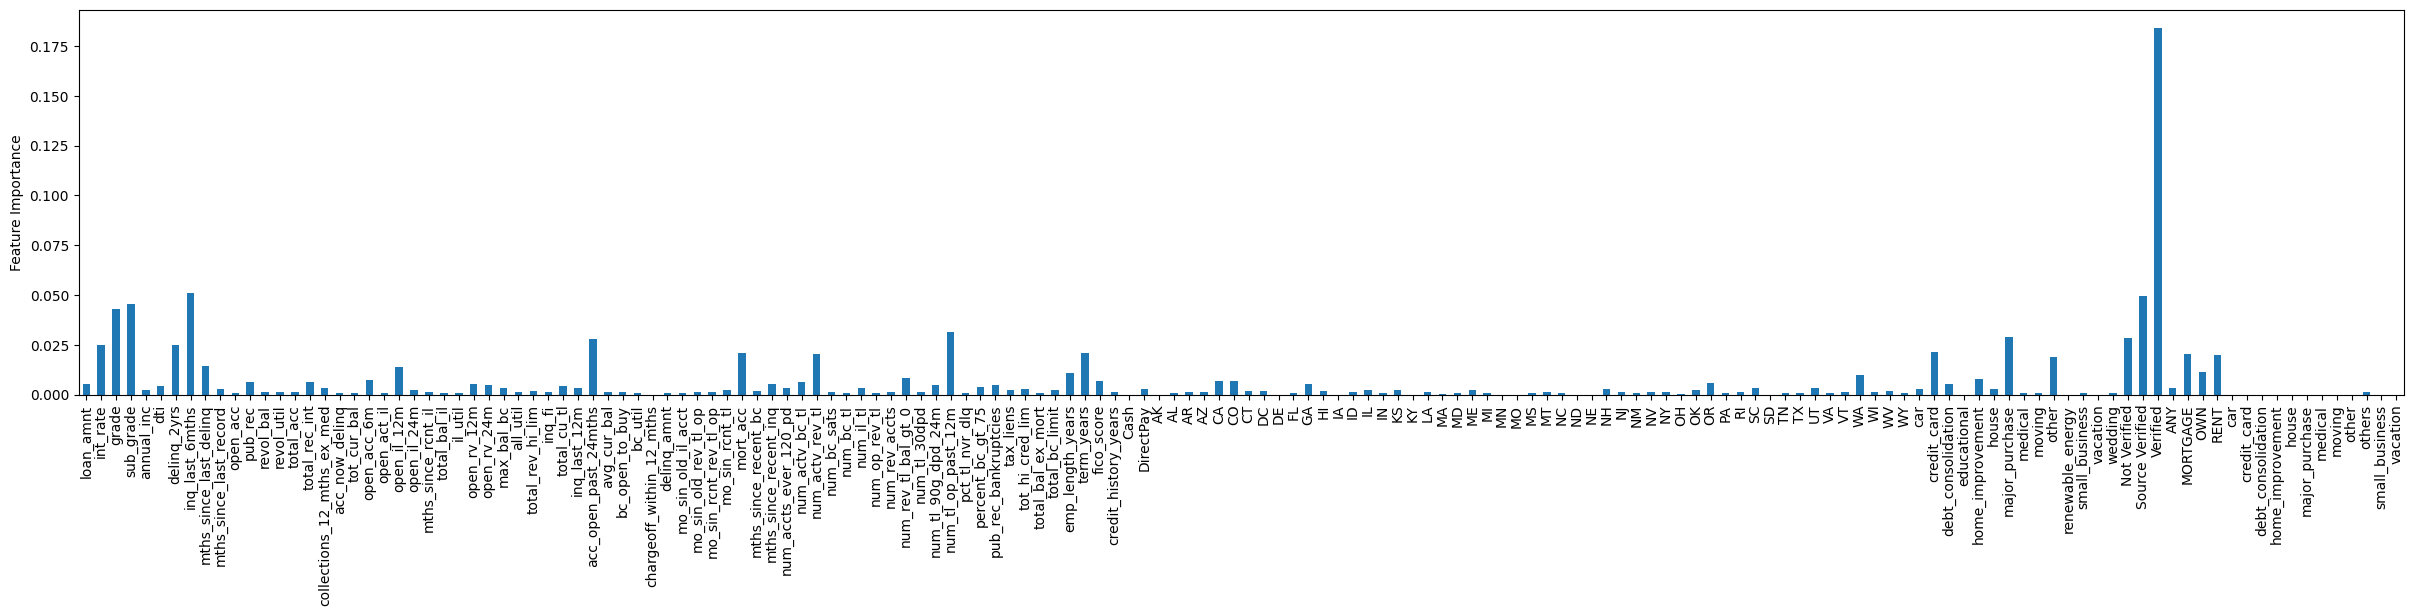

In [ ]:
feature_importance.plot(kind = 'bar', figsize=(30,5)) #Feature importance by XGBoost model
plt.ylabel("Feature Importance")

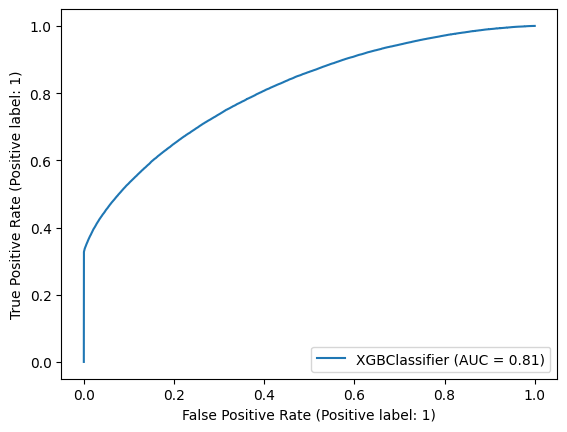

In [ ]:
RocCurveDisplay.from_estimator(model, X_test1, y_test1) #Using random forest features , Same features
#will check both features now

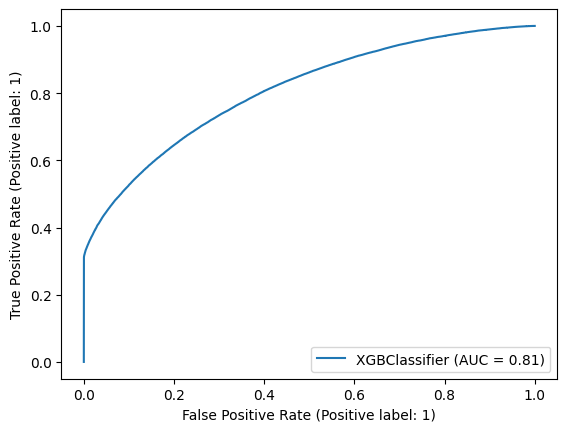

In [ ]:
RocCurveDisplay.from_estimator(model, X_test1, y_test1) #reduced to 81 / before it was 85%

In [ ]:
top_20_features = feature_importance.sort_values(ascending=False).head(20)

#print top 20 features
print(top_20_features)

#top 20 features names
top_20_feature_names = top_20_features.index.tolist()

# features with their importance
top_15_features_dictionary = top_20_features.to_dict()

Verified                  0.184021
inq_last_6mths            0.051153
Source Verified           0.049348
sub_grade                 0.045329
grade                     0.042917
num_tl_op_past_12m        0.031477
major_purchase            0.028786
Not Verified              0.028485
acc_open_past_24mths      0.027697
delinq_2yrs               0.025006
int_rate                  0.024977
credit_card               0.021520
mort_acc                  0.020874
term_years                0.020753
MORTGAGE                  0.020472
num_actv_rev_tl           0.020274
RENT                      0.019897
other                     0.018880
mths_since_last_delinq    0.014499
open_il_12m               0.013634
dtype: float32


In [ ]:
#Top 20 Random forest features
# int_rate                  0.103815
# sub_grade                 0.090078
# term_years                0.069046
# inq_last_6mths            0.056685
# grade                     0.043905
# mths_since_last_delinq    0.040788
# num_tl_op_past_12m        0.040080
# Not Verified              0.031871
# acc_open_past_24mths      0.027840
# MORTGAGE                  0.021562
# fico_score                0.019258
# num_rev_tl_bal_gt_0       0.018925
# emp_length_years          0.018649
# Source Verified           0.018555
# mths_since_last_record    0.018435
# num_actv_rev_tl           0.016808
# pub_rec                   0.016671
# Verified                  0.015231
# mths_since_recent_inq     0.015043
# mort_acc                  0.014041

In [ ]:
print(top_20_feature_names) #top 20 XGBoost features

['Verified', 'inq_last_6mths', 'Source Verified', 'sub_grade', 'grade', 'num_tl_op_past_12m', 'major_purchase', 'Not Verified', 'acc_open_past_24mths', 'delinq_2yrs', 'int_rate', 'credit_card', 'mort_acc', 'term_years', 'MORTGAGE', 'num_actv_rev_tl', 'RENT', 'other', 'mths_since_last_delinq', 'open_il_12m']


In [ ]:
random_f_list = ['int_rate', 'term_years', 'fico_score', 'dti', 'loan_amnt', 'acc_open_past_24mths', 'bc_open_to_buy', 'tot_hi_cred_lim', 'avg_cur_bal', 'Not Verified', 'tot_cur_bal', 'total_bc_limit', 'mort_acc', 'annual_inc', 'bc_util']

In [ ]:
#function to find common features between top 20 feature lists of XGBoost and Random Forest
def common_features(list1, list2):
    # set will give unique features of both the list
    set1 = set(list1)
    set2 = set(list2)

    # Union of two sets of list
    common_features = set1.union(set2)

    # return list of combined features
    return list(common_features)

In [ ]:
common_features = common_features(top_15_feature_names, random_f_list)
print(common_features)

['tot_hi_cred_lim', 'mort_acc', 'loan_amnt', 'annual_inc', 'open_acc_6m', 'total_bc_limit', 'dti', 'open_rv_24m', 'RENT', 'term_years', 'bc_open_to_buy', 'avg_cur_bal', 'tot_cur_bal', 'acc_open_past_24mths', 'bc_util', 'Not Verified', 'MORTGAGE', 'all_util', 'fico_score', 'int_rate']


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df1['loan_status'].value_counts()

,count
loan_status,
0,227836
1,201407


Text(0, 0.5, 'Feature Importance')

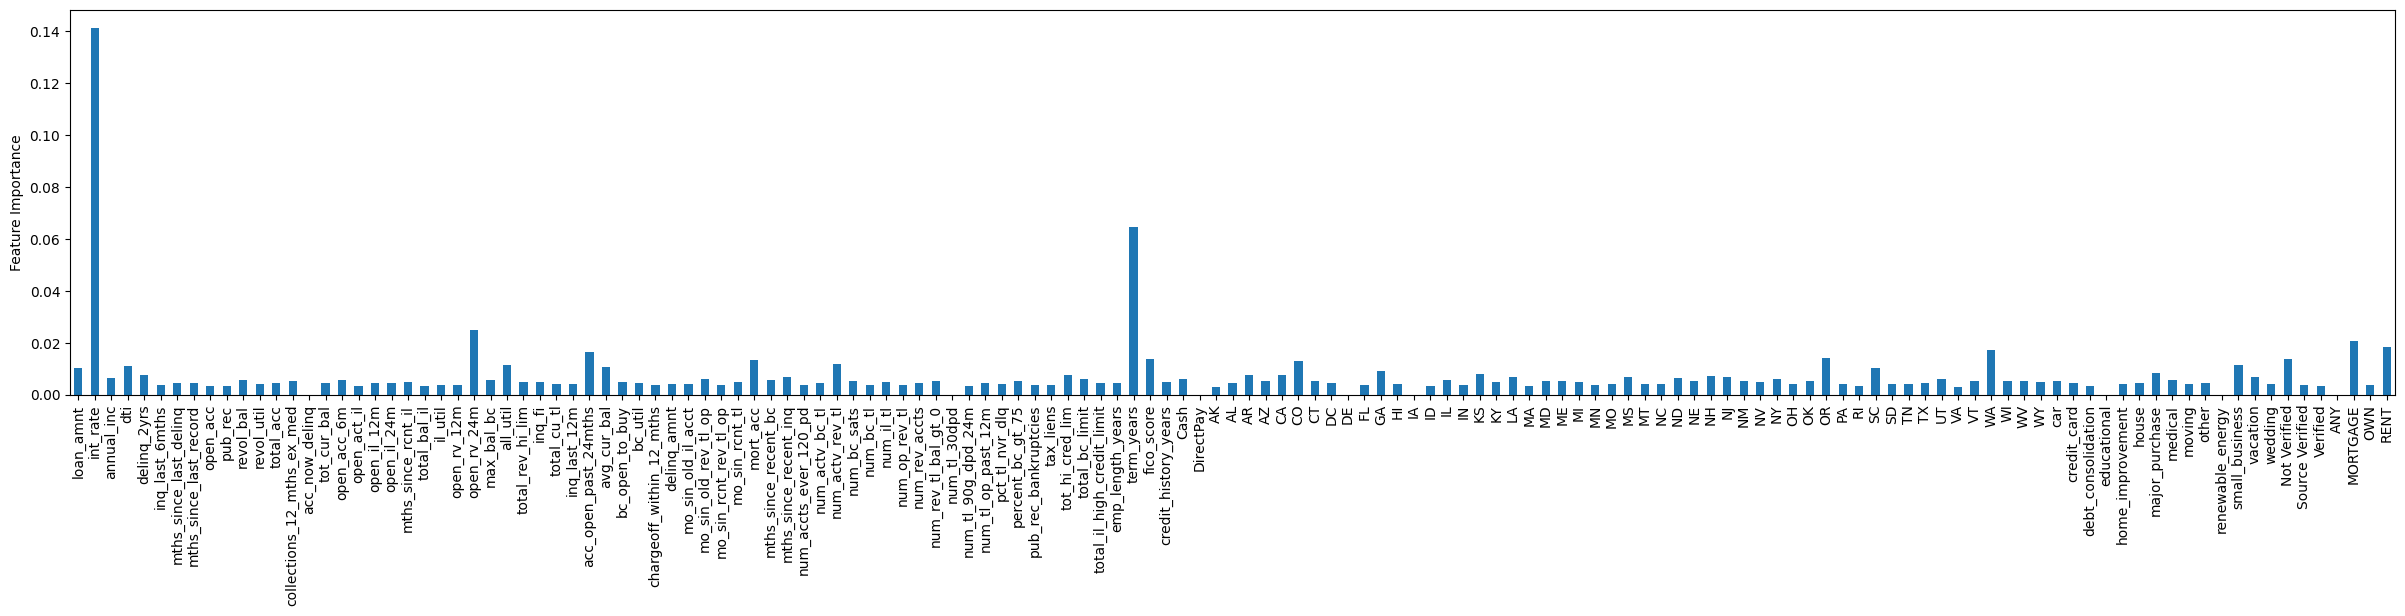

In [ ]:
feature_importance.plot(kind = 'bar', figsize=(30,5))
plt.ylabel("Feature Importance")